In [1]:
from datascience import *
import numpy as np

%matplotlib inline
import matplotlib.pyplot as plots
plots.style.use('fivethirtyeight')

## The GSI's Defense ##
- find the count of students in every section
- find the average score of every section
- find the count of students of section 3
- find the average score of section 3

Find a random sample of students of the same size as the number of students of section 3 and calculate their average score

In [2]:
scores = Table.read_table('data/scores_by_section.csv')
scores

Section,Midterm
1,22
2,12
2,23
2,14
1,20
3,25
4,19
1,24
5,8
6,14


In [3]:
grouped_sizes = scores.group('Section')
grouped_sizes

Section,count
1,32
2,32
3,27
4,30
5,33
6,32
7,24
8,29
9,30
10,34


In [4]:
grouped_averages = scores.group('Section', np.average)
grouped_averages

Section,Midterm average
1,15.5938
2,15.125
3,13.6667
4,14.7667
5,17.4545
6,15.0312
7,16.625
8,16.3103
9,14.5667
10,15.2353


In [5]:
observed_average = grouped_averages.where('Section', 3).column('Midterm average').item(0)
observed_average

13.666666666666666

In [6]:
observed_size = grouped_sizes.where('Section', 3).column('count').item(0)
random_sample = scores.sample(observed_size, with_replacement=False)
random_sample

Section,Midterm
12,10
12,11
7,10
12,22
9,8
10,20
12,19
10,18
7,12
10,13


In [7]:
np.average(random_sample.column('Midterm'))

14.814814814814815

## Make a simulation
we just calculated one sample. Let's do this 50 000 times.
- Write a function that takes a random sample and calculates the average score
- evaluate the functions 50 000 times
- plot the results in a histogram (need to create a table first)
- add the observed average as a point

What do you think; could the TA just have gotten unlucky? 

In [8]:
# Simulate one value of the test statistic 
# under the hypothesis that the section is like a random sample from the class

def random_sample_midterm_avg():
    random_sample = scores.sample(27, with_replacement = False)
    return np.average(random_sample.column('Midterm'))

In [9]:
# Simulate 50,000 copies of the test statistic

sample_averages = make_array()

for i in np.arange(50_000):
    sample_averages = np.append(sample_averages, random_sample_midterm_avg())    

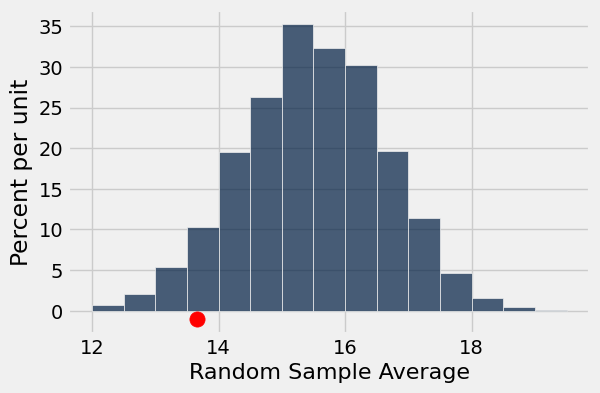

In [10]:
# Compare the simulated distribution of the statistic
# and the actual observed statistic
averages_tbl = Table().with_column('Random Sample Average', sample_averages)
averages_tbl.hist(bins = np.arange(12, 20, 0.5))
plots.scatter(observed_average, -0.01, color='red', s=120);

---
back to slides

--- 

## Conventions About Inconsistency

### Approach 1
1. Find the area of the histogram that is beyond our observed value.
    - How do we find all simulation results that had statistics less than our observed statistic?
    
1. Find the share of simuations that had statistics less than our observed statistic?
    - This is called the `p-value`
    
1. See if this is less than 5%

In [11]:
np.count_nonzero(sample_averages <= observed_average) / 50_000

0.05816

### Approach 2
1. Find simulated value corresponding to 5% of 50,000 = 2500. Call it  `five_percent_point`
1. See if this value is greater than observed value

In [18]:
cutoff = int(0.05 * 50_000) - 1
five_percent_point = averages_tbl.sort(0).column(0).item(cutoff)
five_percent_point

13.592592592592593

In [17]:
observed_average

13.666666666666666

### Visual Representation
- plot the histogram
- add a title
- add a line with the `five_percent_point`
- add a dot for the the observed average

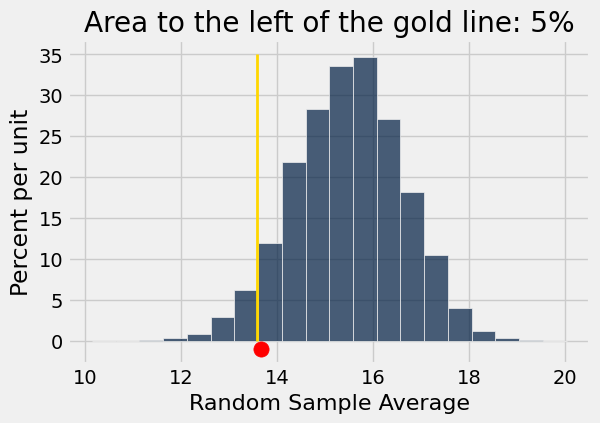

In [14]:
averages_tbl.hist(bins = 20)
plots.plot([five_percent_point, five_percent_point], [0, 0.35], color='gold', lw=2)
plots.title('Area to the left of the gold line: 5%');
plots.scatter(observed_average, -0.01, color='red', s=120);